# Transformadas discretas

<p align="center">
  <img src="Imagens/logo_virtus2.png" width="300"/>
</p>

# Sumário

1. [Trasnformada de Fourier discreta (DFT)](#dft)

    1.1 [Convoluções linear e circular](#lincirc)

    1.2 [Método de Sobreposição e Soma](#soma)
    
    1.3 [Método de Sobreposição e Armazenamento](#armazenamento)

## 1. Tranformada de Fourier discreta (DFT)

A tranformada de Fourier discreta é caracterizada como sendo o processo de amostragem da transmforada de fourier, periódica em $2\pi$ tomando-se N amostras uniformemente espaçadas entre 0 e $2\pi$. Utilizando as frequências $\omega _k = (2\pi /N) k, \quad k \in \mathbb{Z}$, tal que:

$$
X'(e^{j\omega}) = X(e^{j\omega}) \sum_{k=-\infty}^{\infty} \delta\left(\omega - \frac{2\pi}{N}k\right) \tag{1}
$$

Aplicando o teorema da convolução e a transformada inversa às amostras obtidas, nós podemos relacionar o sinal $x(t)$cuja transformada de Fourier é $X(j\omega)$ com o sinal $x'(t)$ obtido a partir da amostragem o espectro do sinal de $x(t)$ de tamanho L da seguinte forma:

$$
x'(n) = x(n) * \frac{N}{2\pi} \sum_{p=-\infty}^{\infty} \delta(n - Np) = \frac{N}{2\pi} \sum_{p=-\infty}^{\infty} x(n - Np) \tag{2}
$$

Essa equação mostra que o sinal $x'(t)$ é composto por repetições periódicas do sinal discreto original $x(n)$, em que o período é dado por $N$. Logo, o sinal só pode er recuperado se seu tamanho $L\leq N$

Podemos recuperar o sinal discreto original a partir das amostras de seu espectro pela relação:

$$
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X\left(e^{j\left(\frac{2\pi}{N}\right)k}\right) e^{j\left(\frac{2\pi}{N}\right)kn}, \quad \text{para } 0 \leq n \leq N - 1. \tag{3}
$$

Esssa relação é conhecida como Tranformada de Fourier Discreta Inversa (IDFT)

Se definirmos $W_N = e^{-j2\pi /N}$,as definições da DFT e da IDFT se tornam:

$$
X(k) = \sum_{n=0}^{N-1} x(n)\, W_N^{kn}, \quad \text{para } 0 \leq k \leq N - 1. \tag{4}
$$

$$
x(n) = \frac{1}{N} \sum_{k=0}^{N-1} X(k)\, W_N^{-kn}, \quad \text{para } 0 \leq n \leq N - 1. \tag{5}
$$

em que tanto $x(n)$ como $X(k)$ são periódicas com período N

In [42]:
import numpy as np
import matplotlib.pyplot as plt


def DFT(x, N):
    '''Compute the N-point Discrete Fourier Transform of a 1D array x with length L.
    If N > L, zero-pad x to length N.
    
    Parameters:
    x : 1D array
    N : int        Length of the DFT.

    Returns:
    X : 1D array   DFT of x.
    '''

    W_N = np.exp(-1j * 2 * np.pi / N)
    X = np.zeros(N, dtype=complex)
    if len(x) < N:
        x = np.pad(x, (0, N - len(x)), 'constant') # Zero-padding
    for k in range(N):
        for n in range(len(x)):
            X[k] += x[n] * W_N**(k*n)

    return (1/np.sqrt(N))*X

def IDFT(X, N):
    '''Compute the N-point Inverse Discrete Fourier Transform of a 1D array X with length N.

    Parameters:
    X : 1D array
    N : int        Length of the IDFT.

    Returns:
    x : 1D array   IDFT of X.
    '''

    W_N = np.exp(-1j * 2 * np.pi / N)
    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * W_N**(-k*n)
    return (1/np.sqrt(N))*x


Comparison with numpy.fft:

N = 100,k =  0.000000: Max Error:   1.0571e-12, Mean Error:   6.9284e-14
N = 100,k =  0.500000: Max Error:   1.0842e-12, Mean Error:   7.1028e-14
N = 100,k =  1.500000: Max Error:   1.1213e-12, Mean Error:   7.5445e-14
N = 100,k =  3.000000: Max Error:   1.1211e-12, Mean Error:   8.3594e-14
N = 200,k =  0.000000: Max Error:   2.0456e-11, Mean Error:   6.3168e-13
N = 200,k =  0.500000: Max Error:   2.0546e-11, Mean Error:   6.7207e-13
N = 200,k =  1.500000: Max Error:   2.0800e-11, Mean Error:   8.2802e-13
N = 200,k =  3.000000: Max Error:   2.1148e-11, Mean Error:   1.0881e-12
N = 400,k =  0.000000: Max Error:   1.0553e-11, Mean Error:   3.3303e-13
N = 400,k =  0.500000: Max Error:   1.0607e-11, Mean Error:   3.5094e-13
N = 400,k =  1.500000: Max Error:   1.0736e-11, Mean Error:   4.2770e-13
N = 400,k =  3.000000: Max Error:   1.0933e-11, Mean Error:   5.5901e-13
N = 800,k =  0.000000: Max Error:   9.2726e-11, Mean Error:   2.8086e-12
N = 800,k =  0.500000: 

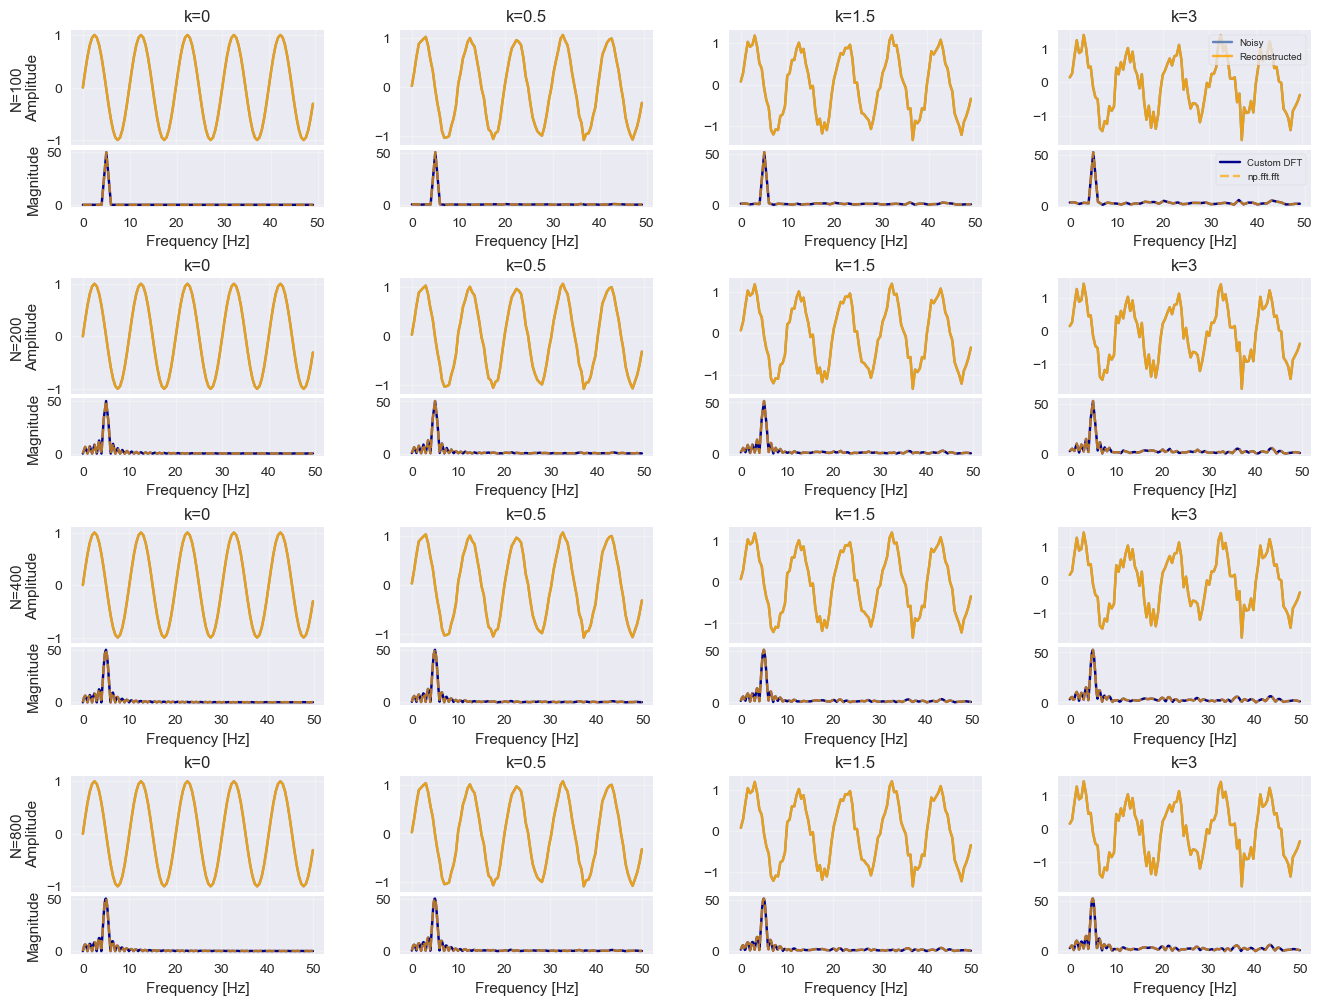

In [43]:
from matplotlib import gridspec
np.random.seed(42)

fs = 100   # Sampling frequency
t = np.arange(0, 1, 1/fs)   # Time vector
f = 5    # Frequency of the sine wave
x = np.sin(2 * np.pi * f * t)    # Sine wave
k = [0,0.5, 1.5, 3]    # Noise intensities
noise = np.random.normal(0, 0.1, x.shape)    # Gaussian noise
L = len(x)    # Length of the signal
N = [L, 2*L, 4*L, 8*L]    # Different DFT lengths

plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(4*len(k), 3*len(N)))
outer = gridspec.GridSpec(len(N), len(k), wspace=0.3, hspace=0.4)

print("Comparison with numpy.fft:\n")
for i, N in enumerate(N):
    for j, k_val in enumerate(k):
        # Noisy signal
        x_noisy = x + k_val * noise

        # DFT and IDFT scaled to match numpy.fft
        X = np.sqrt(N) * DFT(x_noisy, N)    
        x_rec = (1/np.sqrt(N)) * IDFT(X, N).real

        # numpy.fft and numpy.fft.ifft
        X_np = np.fft.fft(x_noisy, n=N)
        x_rec_np = np.fft.ifft(X_np)

        # Error metrics
        err_max = np.max(np.abs(X - X_np))
        err_mean = np.mean(np.abs(X - X_np))
        print(f"N = {N:2d},k =  {k_val:1f}: Max Error: {err_max:12.4e}, Mean Error: {err_mean:12.4e}")

        # Positive axis for frequency
        freqs = np.fft.fftfreq(N, d=1/fs)
        pos = freqs >= 0


        # ------- Plotting ------- #

        # Inner gridspec for time and frequency plots
        inner = gridspec.GridSpecFromSubplotSpec(
            2, 1, subplot_spec=outer[i, j],
            height_ratios=[2, 1], hspace=0.05
        )

        # Time axis
        ax_time = plt.Subplot(fig, inner[0])
        ax_time.plot(t, x_noisy, label='Noisy', alpha=0.85)
        ax_time.plot(t, x_rec[:L], label='Reconstructed', alpha=0.85, color='orange')
        if j == 0:
            ax_time.set_ylabel(f'N={N}\nAmplitude')
        ax_time.set_xticklabels([])  
        ax_time.grid(True, alpha=0.3)
        ax_time.set_title(f'k={k_val}')
        if i == 0 and j == len(k) - 1:
            ax_time.legend(fontsize=7, loc='upper right', frameon=True)
        fig.add_subplot(ax_time)

        # Frequency axis
        ax_freq = plt.Subplot(fig, inner[1])
        ax_freq.plot(freqs[pos], np.abs(X[pos]), color='darkblue')
        ax_freq.plot(freqs[pos], np.abs(X_np[pos]), linestyle='--', color='orange', alpha=0.7)
        ax_freq.set_xlabel('Frequency [Hz]')
        if j == 0:
            ax_freq.set_ylabel('Magnitude')
        if i == 0 and j == len(k) - 1:
            ax_freq.legend(['Custom DFT', 'np.fft.fft'], fontsize=7, loc='upper right', frameon=True)
        ax_freq.grid(True, alpha=0.3)
        fig.add_subplot(ax_freq)

plt.show()

